In [1]:
import numpy as np
import pandas as pd
data_train = pd.read_csv("data/train_data.csv")
data_test = pd.read_csv("data/test_data_new.csv")
data_train = data_train.dropna(how='any')
data_test = data_test.dropna(how='any')
data_test.rename(columns={'Label':'Labels'}, inplace = True)
data_train.info()
data_train.tail()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8414 entries, 0 to 8413
Data columns (total 3 columns):
ID        8414 non-null int64
Text      8414 non-null object
Labels    8414 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 262.9+ KB


,ID,Text,Labels
8409,8410,姗姗文笔很好啊 __eou__ 姗姗文采正经不错和我在伯仲之间吧 __eou__ 见识过你的...,2666.0
8410,8411,哈哈哈哈哈，难以想象那张地包天也是出自我手 __eou__ 他发的这张在朋友圈好评多多 __...,1222.0
8411,8412,帅哥，生活惬意到让人眼红啊 __eou__ 你们也快了！几号出发？ __eou__ 要考试了...,2662.0
8412,8413,你不是我认识的fsr了 __eou__ 我还是那个天真善良玉树临风的我 __eou__ 我看...,6666.0
8413,8414,脸好小啊啊啊啊羡慕 __eou__ 很难，我都胖成麻瓜那样了，因为脸不长肉，谁都给我硬塞饭 ...,2331.0


In [2]:
data_test.info()
data_test.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 3 columns):
ID        1000 non-null int64
Text      1000 non-null object
Labels    1000 non-null int64
dtypes: int64(2), object(1)
memory usage: 31.2+ KB


,ID,Text,Labels
0,1,竟然有脑残支持郭敬明 __eou__ 很多那样的粉好吓人 __eou__ 追星也要有个底吧感...,555
1,2,你居然也记得珍珠传奇！！！那可能是我记事之后看的第一部电视剧 __eou__ 当时觉得老好看...,6222
2,3,俺们这里遇到堵车，比如支路转到干路，大家的潜规则是直走一辆横走一辆，没交警，完全靠自觉。 _...,6666
3,4,会的！不过我从奇葩说就对他挺有好感滴 __eou__ 我都看到你关注透明人了！ __eou_...,266
4,5,亲爱滴，你也太可爱了 __eou__ 你终于出现了啊 __eou__ 嘿嘿，我今天可是代表西...,2622


In [3]:
data_train['Labels'] = data_train['Labels'].apply(lambda x: str(int(x)))
data_train['Length'] = data_train['Labels'].apply(lambda x: len(x)-1)
data_test['Labels'] = data_test['Labels'].apply(lambda x: str(int(x)))
data_test['Length'] = data_test['Labels'].apply(lambda x: len(x))
data_test.head()

,ID,Text,Labels,Length
0,1,竟然有脑残支持郭敬明 __eou__ 很多那样的粉好吓人 __eou__ 追星也要有个底吧感...,555,3
1,2,你居然也记得珍珠传奇！！！那可能是我记事之后看的第一部电视剧 __eou__ 当时觉得老好看...,6222,4
2,3,俺们这里遇到堵车，比如支路转到干路，大家的潜规则是直走一辆横走一辆，没交警，完全靠自觉。 _...,6666,4
3,4,会的！不过我从奇葩说就对他挺有好感滴 __eou__ 我都看到你关注透明人了！ __eou_...,266,3
4,5,亲爱滴，你也太可爱了 __eou__ 你终于出现了啊 __eou__ 嘿嘿，我今天可是代表西...,2622,4


In [4]:
#data_train['NewLabels'] = data_train['Labels'].apply(lambda x: x[:-1])
#data_train['NewLabels'] = data_train['NewLabels'].apply(lambda x: x.ljust(data_train['Length'].max(), '0'))
data_train['FinalLabel'] = data_train['Labels'].apply(lambda x: x[len(x)-1])
print(data_train['Length'].min())
print(data_train['Length'].max())
data_train.tail()

3
9


,ID,Text,Labels,Length,FinalLabel
8409,8410,姗姗文笔很好啊 __eou__ 姗姗文采正经不错和我在伯仲之间吧 __eou__ 见识过你的...,2666,3,6
8410,8411,哈哈哈哈哈，难以想象那张地包天也是出自我手 __eou__ 他发的这张在朋友圈好评多多 __...,1222,3,2
8411,8412,帅哥，生活惬意到让人眼红啊 __eou__ 你们也快了！几号出发？ __eou__ 要考试了...,2662,3,2
8412,8413,你不是我认识的fsr了 __eou__ 我还是那个天真善良玉树临风的我 __eou__ 我看...,6666,3,6
8413,8414,脸好小啊啊啊啊羡慕 __eou__ 很难，我都胖成麻瓜那样了，因为脸不长肉，谁都给我硬塞饭 ...,2331,3,1


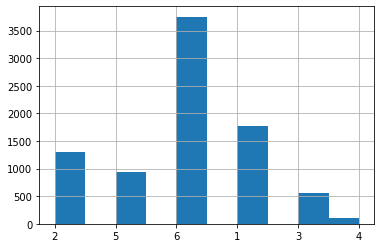

In [91]:
import matplotlib.pyplot as plt
data_train['FinalLabel'].hist()
plt.show()

In [92]:
data_test['NewLabels'] = data_test['Labels'].apply(lambda x: x[:-1])
data_test['NewLabels'] = data_test['NewLabels'].apply(lambda x: x.ljust(data_test['Length'].max(), '0'))
data_test['FinalLabel'] = data_test['Labels'].apply(lambda x: x[len(x)-1])
print(data_test['Length'].min())
print(data_test['Length'].max())
data_test.head()

3
7


,ID,Text,Labels,Length,NewLabels,FinalLabel
0,1,竟然有脑残支持郭敬明 __eou__ 很多那样的粉好吓人 __eou__ 追星也要有个底吧感...,555,3,5500000,5
1,2,你居然也记得珍珠传奇！！！那可能是我记事之后看的第一部电视剧 __eou__ 当时觉得老好看...,6222,4,6220000,2
2,3,俺们这里遇到堵车，比如支路转到干路，大家的潜规则是直走一辆横走一辆，没交警，完全靠自觉。 _...,6666,4,6660000,6
3,4,会的！不过我从奇葩说就对他挺有好感滴 __eou__ 我都看到你关注透明人了！ __eou_...,266,3,2600000,6
4,5,亲爱滴，你也太可爱了 __eou__ 你终于出现了啊 __eou__ 嘿嘿，我今天可是代表西...,2622,4,2620000,2


In [93]:
data_len = len(data_train)
sen_min = data_train['Length'].min()
senti_class = np.zeros([data_len,6])
final_senti = np.zeros([data_len, sen_min])

for i in range(0, data_len):
    for j in range(0, len(data_train.iloc[i]['Labels'])-1):
        senti_class[i][int(data_train.iloc[i]['Labels'][j])-1] += 1 
    for j in range(0, sen_min):
        final_senti[i][j] = str(data_train.iloc[i]['Labels'][len(data_train.iloc[i]['Labels'])-2-j])
data_train.tail()

,ID,Text,Labels,Length,NewLabels,FinalLabel
8409,8410,姗姗文笔很好啊 __eou__ 姗姗文采正经不错和我在伯仲之间吧 __eou__ 见识过你的...,2666,3,266000000,6
8410,8411,哈哈哈哈哈，难以想象那张地包天也是出自我手 __eou__ 他发的这张在朋友圈好评多多 __...,1222,3,122000000,2
8411,8412,帅哥，生活惬意到让人眼红啊 __eou__ 你们也快了！几号出发？ __eou__ 要考试了...,2662,3,266000000,2
8412,8413,你不是我认识的fsr了 __eou__ 我还是那个天真善良玉树临风的我 __eou__ 我看...,6666,3,666000000,6
8413,8414,脸好小啊啊啊啊羡慕 __eou__ 很难，我都胖成麻瓜那样了，因为脸不长肉，谁都给我硬塞饭 ...,2331,3,233000000,1


In [94]:
train_df = pd.DataFrame(data_train, columns=['Text','Length'])
train_df['FinalLabel'] = data_train['FinalLabel'].apply(lambda x: int(x)-1)
bert_info = pd.read_csv("bert_res2/train_res_big2.csv")
#bert_info = pd.read_csv("bert_robert/train_results_1.csv")
#train_df['bert_info'] = bert_info['polarity']-1
train_df['bert_info1'] = bert_info['0']
train_df['bert_info2'] = bert_info['1']
train_df['bert_info3'] = bert_info['2']
train_df['bert_info4'] = bert_info['3']
train_df['bert_info5'] = bert_info['4']
train_df['bert_info6'] = bert_info['5']
train_df[['snti_1', 'snti_2', 'snti_3', 'snti_4', 'snti_5', 'snti_6']] = pd.DataFrame(senti_class, index=train_df.index)


for i in range(0, data_train['Length'].min()):
    train_df['final_'+str(i+1)] = pd.DataFrame(final_senti[:,i], index=train_df.index)
train_df[].head()

,Text,Length,FinalLabel,bert_info1,bert_info2,bert_info3,bert_info4,bert_info5,bert_info6,snti_1,snti_2,snti_3,snti_4,snti_5,snti_6,final_1,final_2,final_3
0,我就奇怪了 为啥你能拍得这么美呢 __eou__ 因为我做什么都认真，都诚心诚意！ __e...,3,1,0.426130,0.539265,0.003114,0.001849,0.004811,0.024831,0.0,3.0,0.0,0.0,0.0,0.0,2.0,2.0,2.0
1,是这是人家自己的事就算我能见到她也不会说你们分手吧什么的可是我真心不喜欢冯绍峰这个理由够吗 ...,3,4,0.002144,0.004571,0.013010,0.002872,0.831100,0.146303,0.0,0.0,0.0,0.0,3.0,0.0,5.0,5.0,5.0
2,狂上加狂的旧时燕飞帝王家和危宫惊梦 __eou__ 哈哈，我也推这本。她古文好厉害 __eo...,3,1,0.006373,0.881770,0.016453,0.003721,0.030330,0.061352,0.0,2.0,0.0,0.0,0.0,1.0,2.0,2.0,6.0
3,呵呵呵呵呵呵呵呵你拍我家枇杷树跟我说了嘛！！！不准吃我家枇杷！！！都我的！！！ __eou_...,3,4,0.003447,0.009858,0.326240,0.013757,0.228055,0.418643,0.0,0.0,0.0,0.0,3.0,0.0,5.0,5.0,5.0
4,哎，我就吃下这个哑巴亏算了 __eou__ 呔，妖怪，死到临头还嘴硬 __eou__ 真不愧...,4,5,0.003734,0.016733,0.384286,0.041278,0.310478,0.243490,0.0,0.0,2.0,0.0,2.0,0.0,3.0,5.0,5.0


In [95]:
train_df['frequntLabel'] = bert_info['0']
temp = train_df[['snti_1', 'snti_2', 'snti_3', 'snti_4', 'snti_5', 'snti_6']]
x=train_df['frequntLabel'].copy()
for index in range(0, len(temp)):
    [score1, score2, score3, score4, score5, score6] = temp.iloc[index]
    #print([score1, score2, score3, score4, score5, score6])
    if max(score1, score2, score3, score4, score5, score6) == score1: 
        x[index] = 0
    elif max(score1, score2, score3, score4, score5, score6) == score2:

        x[index] = 1
    elif max(score1, score2, score3, score4, score5, score6) == score3:

        x[index] = 2
    elif max(score1, score2, score3, score4, score5, score6) == score4:

        x[index] = 3
    elif max(score1, score2, score3, score4, score5, score6) == score5:

        x[index] = 4
    elif max(score1, score2, score3, score4, score5, score6) == score6:
        x[index] = 5
train_df['frequntLabel'] = x
train_df.head()

,Text,Length,FinalLabel,bert_info1,bert_info2,bert_info3,bert_info4,bert_info5,bert_info6,snti_1,snti_2,snti_3,snti_4,snti_5,snti_6,final_1,final_2,final_3,frequntLabel
0,我就奇怪了 为啥你能拍得这么美呢 __eou__ 因为我做什么都认真，都诚心诚意！ __e...,3,1,0.426130,0.539265,0.003114,0.001849,0.004811,0.024831,0.0,3.0,0.0,0.0,0.0,0.0,2.0,2.0,2.0,1.0
1,是这是人家自己的事就算我能见到她也不会说你们分手吧什么的可是我真心不喜欢冯绍峰这个理由够吗 ...,3,4,0.002144,0.004571,0.013010,0.002872,0.831100,0.146303,0.0,0.0,0.0,0.0,3.0,0.0,5.0,5.0,5.0,4.0
2,狂上加狂的旧时燕飞帝王家和危宫惊梦 __eou__ 哈哈，我也推这本。她古文好厉害 __eo...,3,1,0.006373,0.881770,0.016453,0.003721,0.030330,0.061352,0.0,2.0,0.0,0.0,0.0,1.0,2.0,2.0,6.0,1.0
3,呵呵呵呵呵呵呵呵你拍我家枇杷树跟我说了嘛！！！不准吃我家枇杷！！！都我的！！！ __eou_...,3,4,0.003447,0.009858,0.326240,0.013757,0.228055,0.418643,0.0,0.0,0.0,0.0,3.0,0.0,5.0,5.0,5.0,4.0
4,哎，我就吃下这个哑巴亏算了 __eou__ 呔，妖怪，死到临头还嘴硬 __eou__ 真不愧...,4,5,0.003734,0.016733,0.384286,0.041278,0.310478,0.243490,0.0,0.0,2.0,0.0,2.0,0.0,3.0,5.0,5.0,2.0


In [96]:
data_len = len(data_test)
sen_min = data_test['Length'].min()
senti_class = np.zeros([data_len,6])
final_senti = np.zeros([data_len, sen_min])

for i in range(0, data_len):
    for j in range(0, len(data_test.iloc[i]['Labels'])):
        senti_class[i][int(data_test.iloc[i]['Labels'][j])-1] += 1 
    for j in range(0, sen_min):
        final_senti[i][j] = str(data_test.iloc[i]['Labels'][len(data_test.iloc[i]['Labels'])-1-j])

In [97]:
test_df = pd.DataFrame(data_test, columns=['Text','Length'])
#test_df['FinalLabel'] = data_test['FinalLabel'].apply(lambda x: int(x))
bert_info = pd.read_csv("bert_res2/test_res_big2.csv")
#bert_info = pd.read_csv("bert_robert/test_results_1.csv")

#test_df['bert_info'] = bert_info['polarity']-1
test_df['bert_info1'] = bert_info['0']
test_df['bert_info2'] = bert_info['1']
test_df['bert_info3'] = bert_info['2']
test_df['bert_info4'] = bert_info['3']
test_df['bert_info5'] = bert_info['4']
test_df['bert_info6'] = bert_info['5']

test_df[['snti_1', 'snti_2', 'snti_3', 'snti_4', 'snti_5', 'snti_6']] = pd.DataFrame(senti_class, index=test_df.index)
for i in range(0, data_test['Length'].min()):
    test_df['final_'+str(i+1)] = pd.DataFrame(final_senti[:,i], index=test_df.index)
test_df.tail()

,Text,Length,bert_info1,bert_info2,bert_info3,bert_info4,bert_info5,bert_info6,snti_1,snti_2,snti_3,snti_4,snti_5,snti_6,final_1,final_2,final_3
995,哎绍兴会有吗求来上虞开一家，可以开在万达嘛 __eou__ 绍兴有一家正在筹备中 __eou...,3,0.087884,0.473688,0.009630,0.001749,0.015050,0.411998,0.0,0.0,0.0,0.0,0.0,3.0,6.0,6.0,6.0
996,这个彤彤好可爱哦 __eou__ 多油腻啊头发被耳机压的钱今晚住网咖了 __eou__ 为啥...,6,0.077035,0.518889,0.005106,0.002292,0.008712,0.387966,0.0,1.0,1.0,0.0,0.0,4.0,3.0,6.0,6.0
997,苹果姐我想买台微单有好的推荐吗？希望是4000以下的我拍摄风景和儿童为多，我属于入门阶级谢谢...,3,0.006799,0.020156,0.004869,0.001178,0.012483,0.954514,0.0,0.0,0.0,0.0,0.0,3.0,6.0,6.0,6.0
998,所以城野医生的水好用吗？之前一直想入来的 __eou__ 没啥用就是橘子味好闻然后敷上去凉凉...,4,0.007468,0.010572,0.007715,0.001721,0.006716,0.965808,0.0,0.0,0.0,0.0,1.0,3.0,5.0,6.0,6.0
999,2017的梦想是嫁给我喜欢的人，已经实现了！2018希望我们的小baby顺利出生，老公永远爱...,3,0.047746,0.022846,0.011563,0.001801,0.009053,0.906991,0.0,3.0,0.0,0.0,0.0,0.0,2.0,2.0,2.0


In [98]:
test_df['frequntLabel'] = bert_info['0']
temp = test_df[['snti_1', 'snti_2', 'snti_3', 'snti_4', 'snti_5', 'snti_6']]
x=test_df['frequntLabel'].copy()
for index in range(0, len(temp)):
    [score1, score2, score3, score4, score5, score6] = temp.iloc[index]
    #print([score1, score2, score3, score4, score5, score6])
    if max(score1, score2, score3, score4, score5, score6) == score1: 
        x[index] = 0
    elif max(score1, score2, score3, score4, score5, score6) == score2:

        x[index] = 1
    elif max(score1, score2, score3, score4, score5, score6) == score3:

        x[index] = 2
    elif max(score1, score2, score3, score4, score5, score6) == score4:

        x[index] = 3
    elif max(score1, score2, score3, score4, score5, score6) == score5:

        x[index] = 4
    elif max(score1, score2, score3, score4, score5, score6) == score6:
        x[index] = 5
test_df['frequntLabel'] = x
test_df.head()

,Text,Length,bert_info1,bert_info2,bert_info3,bert_info4,bert_info5,bert_info6,snti_1,snti_2,snti_3,snti_4,snti_5,snti_6,final_1,final_2,final_3,frequntLabel
0,竟然有脑残支持郭敬明 __eou__ 很多那样的粉好吓人 __eou__ 追星也要有个底吧感...,3,0.003249,0.006821,0.010830,0.005538,0.955735,0.017829,0.0,0.0,0.0,0.0,3.0,0.0,5.0,5.0,5.0,4.0
1,你居然也记得珍珠传奇！！！那可能是我记事之后看的第一部电视剧 __eou__ 当时觉得老好看...,4,0.981891,0.007112,0.001277,0.000646,0.004271,0.004803,0.0,3.0,0.0,0.0,0.0,1.0,2.0,2.0,2.0,1.0
2,俺们这里遇到堵车，比如支路转到干路，大家的潜规则是直走一辆横走一辆，没交警，完全靠自觉。 _...,4,0.009092,0.020194,0.004610,0.001284,0.009538,0.955282,0.0,0.0,0.0,0.0,0.0,4.0,6.0,6.0,6.0,5.0
3,会的！不过我从奇葩说就对他挺有好感滴 __eou__ 我都看到你关注透明人了！ __eou_...,3,0.758390,0.217657,0.004742,0.002281,0.004307,0.012624,0.0,1.0,0.0,0.0,0.0,2.0,6.0,6.0,2.0,5.0
4,亲爱滴，你也太可爱了 __eou__ 你终于出现了啊 __eou__ 嘿嘿，我今天可是代表西...,4,0.015227,0.585846,0.005014,0.001700,0.030784,0.361430,0.0,3.0,0.0,0.0,0.0,1.0,2.0,2.0,6.0,1.0


In [99]:
train_df[['final_1', 'final_2','final_3','frequntLabel']] = train_df[['final_1', 'final_2','final_3','frequntLabel']].astype('category')
test_df[['final_1', 'final_2','final_3','frequntLabel']] = test_df[['final_1', 'final_2','final_3','frequntLabel']].astype('category')
train_df['final_3'].head()

0    2.0
1    5.0
2    6.0
3    5.0
4    5.0
Name: final_3, dtype: category
Categories (6, float64): [1.0, 2.0, 3.0, 4.0, 5.0, 6.0]

In [100]:
import lightgbm as lgb
from sklearn import datasets
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import roc_auc_score, accuracy_score
from sklearn.metrics import f1_score
Kindex = []
K = 10
width = int(len(train_df)/K)
start = 0
for i in range(1, K): 
    Kindex.append([start, i*width+1])
    start = i*width+2
Kindex.append([start, len(train_df)-1])
print(len(train_df))
print(Kindex)
feature_columns = ['frequntLabel','bert_info1','bert_info2','bert_info3','bert_info4','bert_info5','bert_info6','snti_1','snti_2','snti_3','snti_4','snti_5','snti_6','final_1','final_2','final_3']
test_data_X = np.array(test_df[feature_columns])

f1_scores = []
aucs = []
preds = []

for ifold in range(0, K):
    print("{***************FOLD:"+str(ifold)+"******************}")
    # 加载数据
    #feature_columns = ['bert_info','snti_1','snti_2','snti_3','snti_4','snti_5','snti_6','final_1','final_2','final_3']
    X_valid = (train_df.iloc[Kindex[ifold][0]:Kindex[ifold][1]+1][feature_columns])
    y_valid = (train_df.iloc[Kindex[ifold][0]:Kindex[ifold][1]+1]['FinalLabel'])
    cur_train_index = []
    for cur_index in range(0, len(train_df)):
        if(cur_index >= Kindex[ifold][0] and cur_index <= Kindex[ifold][1]):
            continue
        cur_train_index.append(cur_index)
    tr = train_df.iloc[cur_train_index]
    X_train = (tr[feature_columns])
    y_train = (tr['FinalLabel'])
    # 转换为Dataset数据格式
    train_data = lgb.Dataset(X_train, label=y_train, categorical_feature=['final_1','final_2','final_3'])
    validation_data = lgb.Dataset(X_valid, label=y_valid, categorical_feature=['final_1','final_2','final_3'])
    # 参数
    num_roun = 400
#     if(ifold<=1):
#         num_roun = 700
    #
    params = {
          'n_estimators': num_roun,
          'num_leaves': 35,
          'min_data_in_leaf': 30,
          'objective': 'multiclass',
          'num_class': 6,
          'max_depth': -1,
          'learning_rate': 0.02,
          "min_sum_hessian_in_leaf": 6,
          "boosting": "gbdt",
          "feature_fraction": 0.9,
          "bagging_freq": 1,
          "bagging_fraction": 0.8,
          "bagging_seed": 11,
          "lambda_l1": 0.1,
          "verbosity": -1,
          "nthread": 15,
          'metric': 'multi_logloss',
          "random_state": 1999,
    }

    # 模型训练
    gbm = lgb.train(params, train_data, valid_sets=[validation_data])
    # 模型预测
    y_pred = gbm.predict(test_data_X, num_iteration=gbm.best_iteration)
    preds.append(y_pred)
    y_pred = [list(x).index(max(x)) for x in y_pred]
    print(y_pred)
    # 模型评估
    valid_y_pred = gbm.predict(X_valid)
    valid_y_pred = [list(x).index(max(x)) for x in valid_y_pred]
    print(accuracy_score(y_valid, valid_y_pred))
    #0.7980997624703088
    print(f1_score(y_valid, valid_y_pred, average='macro'))
    aucs.append(accuracy_score(y_valid, valid_y_pred)) 
    f1_scores.append(f1_score(y_valid, valid_y_pred, average='macro'))
    
#train_df.iloc[Kindex[1][0]:Kindex[1][1]+1]    

8414
[[0, 842], [843, 1683], [1684, 2524], [2525, 3365], [3366, 4206], [4207, 5047], [5048, 5888], [5889, 6729], [6730, 7570], [7571, 8413]]
{***************FOLD:0******************}
[1]	valid_0's multi_logloss: 1.63693
[2]	valid_0's multi_logloss: 1.6071
[3]	valid_0's multi_logloss: 1.57803
[4]	valid_0's multi_logloss: 1.55121
[5]	valid_0's multi_logloss: 1.5256
[6]	valid_0's multi_logloss: 1.50274
[7]	valid_0's multi_logloss: 1.47902
[8]	valid_0's multi_logloss: 1.45733
[9]	valid_0's multi_logloss: 1.4376
[10]	valid_0's multi_logloss: 1.41759
[11]	valid_0's multi_logloss: 1.39855
[12]	valid_0's multi_logloss: 1.38036
[13]	valid_0's multi_logloss: 1.36293
[14]	valid_0's multi_logloss: 1.3459
[15]	valid_0's multi_logloss: 1.32981
[16]	valid_0's multi_logloss: 1.31444
[17]	valid_0's multi_logloss: 1.29962
[18]	valid_0's multi_logloss: 1.28557
[19]	valid_0's multi_logloss: 1.27189
[20]	valid_0's multi_logloss: 1.25866
[21]	valid_0's multi_logloss: 1.24621
[22]	valid_0's multi_logloss: 1.

[209]	valid_0's multi_logloss: 0.804162
[210]	valid_0's multi_logloss: 0.803921
[211]	valid_0's multi_logloss: 0.804111
[212]	valid_0's multi_logloss: 0.804242
[213]	valid_0's multi_logloss: 0.804152
[214]	valid_0's multi_logloss: 0.804043
[215]	valid_0's multi_logloss: 0.803947
[216]	valid_0's multi_logloss: 0.803977
[217]	valid_0's multi_logloss: 0.803793
[218]	valid_0's multi_logloss: 0.804048
[219]	valid_0's multi_logloss: 0.803822
[220]	valid_0's multi_logloss: 0.803945
[221]	valid_0's multi_logloss: 0.803881
[222]	valid_0's multi_logloss: 0.80385
[223]	valid_0's multi_logloss: 0.803831
[224]	valid_0's multi_logloss: 0.803873
[225]	valid_0's multi_logloss: 0.803854
[226]	valid_0's multi_logloss: 0.803785
[227]	valid_0's multi_logloss: 0.803703
[228]	valid_0's multi_logloss: 0.803537
[229]	valid_0's multi_logloss: 0.803487
[230]	valid_0's multi_logloss: 0.803279
[231]	valid_0's multi_logloss: 0.803033
[232]	valid_0's multi_logloss: 0.803247
[233]	valid_0's multi_logloss: 0.803438
[

0.6986951364175563
0.6456509769994023
{***************FOLD:1******************}
[1]	valid_0's multi_logloss: 1.43549
[2]	valid_0's multi_logloss: 1.40874
[3]	valid_0's multi_logloss: 1.38303
[4]	valid_0's multi_logloss: 1.35874
[5]	valid_0's multi_logloss: 1.33575
[6]	valid_0's multi_logloss: 1.31462
[7]	valid_0's multi_logloss: 1.29336
[8]	valid_0's multi_logloss: 1.27365
[9]	valid_0's multi_logloss: 1.25541
[10]	valid_0's multi_logloss: 1.23725
[11]	valid_0's multi_logloss: 1.22008
[12]	valid_0's multi_logloss: 1.20304
[13]	valid_0's multi_logloss: 1.18696
[14]	valid_0's multi_logloss: 1.17157
[15]	valid_0's multi_logloss: 1.15665
[16]	valid_0's multi_logloss: 1.14234
[17]	valid_0's multi_logloss: 1.12895
[18]	valid_0's multi_logloss: 1.11606
[19]	valid_0's multi_logloss: 1.10369
[20]	valid_0's multi_logloss: 1.09137
[21]	valid_0's multi_logloss: 1.07926
[22]	valid_0's multi_logloss: 1.06786
[23]	valid_0's multi_logloss: 1.05683
[24]	valid_0's multi_logloss: 1.04647
[25]	valid_0's mu

[208]	valid_0's multi_logloss: 0.654806
[209]	valid_0's multi_logloss: 0.654619
[210]	valid_0's multi_logloss: 0.654538
[211]	valid_0's multi_logloss: 0.654659
[212]	valid_0's multi_logloss: 0.654659
[213]	valid_0's multi_logloss: 0.654587
[214]	valid_0's multi_logloss: 0.654531
[215]	valid_0's multi_logloss: 0.654405
[216]	valid_0's multi_logloss: 0.654341
[217]	valid_0's multi_logloss: 0.654048
[218]	valid_0's multi_logloss: 0.654127
[219]	valid_0's multi_logloss: 0.654043
[220]	valid_0's multi_logloss: 0.653854
[221]	valid_0's multi_logloss: 0.653802
[222]	valid_0's multi_logloss: 0.653726
[223]	valid_0's multi_logloss: 0.653622
[224]	valid_0's multi_logloss: 0.653831
[225]	valid_0's multi_logloss: 0.653795
[226]	valid_0's multi_logloss: 0.653887
[227]	valid_0's multi_logloss: 0.654022
[228]	valid_0's multi_logloss: 0.653832
[229]	valid_0's multi_logloss: 0.653641
[230]	valid_0's multi_logloss: 0.653676
[231]	valid_0's multi_logloss: 0.653642
[232]	valid_0's multi_logloss: 0.653579


0.7586206896551724
0.6898575637289711
{***************FOLD:2******************}
[1]	valid_0's multi_logloss: 1.36605
[2]	valid_0's multi_logloss: 1.34064
[3]	valid_0's multi_logloss: 1.31555
[4]	valid_0's multi_logloss: 1.29187
[5]	valid_0's multi_logloss: 1.26956
[6]	valid_0's multi_logloss: 1.24856
[7]	valid_0's multi_logloss: 1.22816
[8]	valid_0's multi_logloss: 1.20923
[9]	valid_0's multi_logloss: 1.19032
[10]	valid_0's multi_logloss: 1.17246
[11]	valid_0's multi_logloss: 1.1553
[12]	valid_0's multi_logloss: 1.13825
[13]	valid_0's multi_logloss: 1.12253
[14]	valid_0's multi_logloss: 1.10723
[15]	valid_0's multi_logloss: 1.0927
[16]	valid_0's multi_logloss: 1.07839
[17]	valid_0's multi_logloss: 1.06456
[18]	valid_0's multi_logloss: 1.05105
[19]	valid_0's multi_logloss: 1.03788
[20]	valid_0's multi_logloss: 1.02538
[21]	valid_0's multi_logloss: 1.01329
[22]	valid_0's multi_logloss: 1.00152
[23]	valid_0's multi_logloss: 0.990168
[24]	valid_0's multi_logloss: 0.979305
[25]	valid_0's mu

[217]	valid_0's multi_logloss: 0.521999
[218]	valid_0's multi_logloss: 0.521838
[219]	valid_0's multi_logloss: 0.521672
[220]	valid_0's multi_logloss: 0.521445
[221]	valid_0's multi_logloss: 0.521277
[222]	valid_0's multi_logloss: 0.521125
[223]	valid_0's multi_logloss: 0.520963
[224]	valid_0's multi_logloss: 0.520719
[225]	valid_0's multi_logloss: 0.520342
[226]	valid_0's multi_logloss: 0.520156
[227]	valid_0's multi_logloss: 0.520065
[228]	valid_0's multi_logloss: 0.519909
[229]	valid_0's multi_logloss: 0.519769
[230]	valid_0's multi_logloss: 0.519453
[231]	valid_0's multi_logloss: 0.519406
[232]	valid_0's multi_logloss: 0.519215
[233]	valid_0's multi_logloss: 0.519059
[234]	valid_0's multi_logloss: 0.518925
[235]	valid_0's multi_logloss: 0.518795
[236]	valid_0's multi_logloss: 0.518491
[237]	valid_0's multi_logloss: 0.518301
[238]	valid_0's multi_logloss: 0.518057
[239]	valid_0's multi_logloss: 0.518015
[240]	valid_0's multi_logloss: 0.517854
[241]	valid_0's multi_logloss: 0.517737


0.7907253269916765
0.6969434194911006
{***************FOLD:3******************}
[1]	valid_0's multi_logloss: 1.3457
[2]	valid_0's multi_logloss: 1.31881
[3]	valid_0's multi_logloss: 1.29245
[4]	valid_0's multi_logloss: 1.26785
[5]	valid_0's multi_logloss: 1.24424
[6]	valid_0's multi_logloss: 1.22202
[7]	valid_0's multi_logloss: 1.20045
[8]	valid_0's multi_logloss: 1.18
[9]	valid_0's multi_logloss: 1.16047
[10]	valid_0's multi_logloss: 1.14182
[11]	valid_0's multi_logloss: 1.12354
[12]	valid_0's multi_logloss: 1.10569
[13]	valid_0's multi_logloss: 1.08904
[14]	valid_0's multi_logloss: 1.07273
[15]	valid_0's multi_logloss: 1.05765
[16]	valid_0's multi_logloss: 1.04278
[17]	valid_0's multi_logloss: 1.02815
[18]	valid_0's multi_logloss: 1.01391
[19]	valid_0's multi_logloss: 1.00026
[20]	valid_0's multi_logloss: 0.987002
[21]	valid_0's multi_logloss: 0.974355
[22]	valid_0's multi_logloss: 0.962163
[23]	valid_0's multi_logloss: 0.950732
[24]	valid_0's multi_logloss: 0.939581
[25]	valid_0's m

[208]	valid_0's multi_logloss: 0.47044
[209]	valid_0's multi_logloss: 0.470182
[210]	valid_0's multi_logloss: 0.470036
[211]	valid_0's multi_logloss: 0.469793
[212]	valid_0's multi_logloss: 0.469509
[213]	valid_0's multi_logloss: 0.469447
[214]	valid_0's multi_logloss: 0.469131
[215]	valid_0's multi_logloss: 0.468939
[216]	valid_0's multi_logloss: 0.468994
[217]	valid_0's multi_logloss: 0.468799
[218]	valid_0's multi_logloss: 0.468561
[219]	valid_0's multi_logloss: 0.468441
[220]	valid_0's multi_logloss: 0.468265
[221]	valid_0's multi_logloss: 0.468182
[222]	valid_0's multi_logloss: 0.468183
[223]	valid_0's multi_logloss: 0.468097
[224]	valid_0's multi_logloss: 0.468125
[225]	valid_0's multi_logloss: 0.468013
[226]	valid_0's multi_logloss: 0.467704
[227]	valid_0's multi_logloss: 0.467442
[228]	valid_0's multi_logloss: 0.467353
[229]	valid_0's multi_logloss: 0.467365
[230]	valid_0's multi_logloss: 0.467055
[231]	valid_0's multi_logloss: 0.467022
[232]	valid_0's multi_logloss: 0.466757
[

0.8228299643281808
0.7574956100812155
{***************FOLD:4******************}
[1]	valid_0's multi_logloss: 1.29453
[2]	valid_0's multi_logloss: 1.26752
[3]	valid_0's multi_logloss: 1.24115
[4]	valid_0's multi_logloss: 1.21653
[5]	valid_0's multi_logloss: 1.19332
[6]	valid_0's multi_logloss: 1.17122
[7]	valid_0's multi_logloss: 1.15026
[8]	valid_0's multi_logloss: 1.1299
[9]	valid_0's multi_logloss: 1.11068
[10]	valid_0's multi_logloss: 1.09248
[11]	valid_0's multi_logloss: 1.07464
[12]	valid_0's multi_logloss: 1.05699
[13]	valid_0's multi_logloss: 1.04057
[14]	valid_0's multi_logloss: 1.02442
[15]	valid_0's multi_logloss: 1.00911
[16]	valid_0's multi_logloss: 0.994
[17]	valid_0's multi_logloss: 0.979452
[18]	valid_0's multi_logloss: 0.965334
[19]	valid_0's multi_logloss: 0.951995
[20]	valid_0's multi_logloss: 0.938843
[21]	valid_0's multi_logloss: 0.926073
[22]	valid_0's multi_logloss: 0.913752
[23]	valid_0's multi_logloss: 0.902153
[24]	valid_0's multi_logloss: 0.891008
[25]	valid_0

[208]	valid_0's multi_logloss: 0.400635
[209]	valid_0's multi_logloss: 0.400186
[210]	valid_0's multi_logloss: 0.399971
[211]	valid_0's multi_logloss: 0.399671
[212]	valid_0's multi_logloss: 0.399394
[213]	valid_0's multi_logloss: 0.399298
[214]	valid_0's multi_logloss: 0.398929
[215]	valid_0's multi_logloss: 0.398681
[216]	valid_0's multi_logloss: 0.398527
[217]	valid_0's multi_logloss: 0.398224
[218]	valid_0's multi_logloss: 0.397977
[219]	valid_0's multi_logloss: 0.397669
[220]	valid_0's multi_logloss: 0.397393
[221]	valid_0's multi_logloss: 0.397125
[222]	valid_0's multi_logloss: 0.396915
[223]	valid_0's multi_logloss: 0.396799
[224]	valid_0's multi_logloss: 0.396614
[225]	valid_0's multi_logloss: 0.396289
[226]	valid_0's multi_logloss: 0.396104
[227]	valid_0's multi_logloss: 0.395923
[228]	valid_0's multi_logloss: 0.395685
[229]	valid_0's multi_logloss: 0.3954
[230]	valid_0's multi_logloss: 0.395163
[231]	valid_0's multi_logloss: 0.39486
[232]	valid_0's multi_logloss: 0.394604
[23

0.8596908442330559
0.7525686598770848
{***************FOLD:5******************}
[1]	valid_0's multi_logloss: 1.2982
[2]	valid_0's multi_logloss: 1.27324
[3]	valid_0's multi_logloss: 1.24885
[4]	valid_0's multi_logloss: 1.22586
[5]	valid_0's multi_logloss: 1.20418
[6]	valid_0's multi_logloss: 1.18358
[7]	valid_0's multi_logloss: 1.16358
[8]	valid_0's multi_logloss: 1.14448
[9]	valid_0's multi_logloss: 1.12663
[10]	valid_0's multi_logloss: 1.10942
[11]	valid_0's multi_logloss: 1.09279
[12]	valid_0's multi_logloss: 1.07654
[13]	valid_0's multi_logloss: 1.06109
[14]	valid_0's multi_logloss: 1.04593
[15]	valid_0's multi_logloss: 1.03147
[16]	valid_0's multi_logloss: 1.01754
[17]	valid_0's multi_logloss: 1.00372
[18]	valid_0's multi_logloss: 0.990528
[19]	valid_0's multi_logloss: 0.977915
[20]	valid_0's multi_logloss: 0.965444
[21]	valid_0's multi_logloss: 0.953445
[22]	valid_0's multi_logloss: 0.942082
[23]	valid_0's multi_logloss: 0.931136
[24]	valid_0's multi_logloss: 0.9204
[25]	valid_0'

[215]	valid_0's multi_logloss: 0.477931
[216]	valid_0's multi_logloss: 0.477816
[217]	valid_0's multi_logloss: 0.477442
[218]	valid_0's multi_logloss: 0.477182
[219]	valid_0's multi_logloss: 0.476999
[220]	valid_0's multi_logloss: 0.476732
[221]	valid_0's multi_logloss: 0.476544
[222]	valid_0's multi_logloss: 0.476304
[223]	valid_0's multi_logloss: 0.476168
[224]	valid_0's multi_logloss: 0.475918
[225]	valid_0's multi_logloss: 0.475693
[226]	valid_0's multi_logloss: 0.475563
[227]	valid_0's multi_logloss: 0.475344
[228]	valid_0's multi_logloss: 0.475179
[229]	valid_0's multi_logloss: 0.475126
[230]	valid_0's multi_logloss: 0.474982
[231]	valid_0's multi_logloss: 0.474977
[232]	valid_0's multi_logloss: 0.474806
[233]	valid_0's multi_logloss: 0.474761
[234]	valid_0's multi_logloss: 0.474592
[235]	valid_0's multi_logloss: 0.474455
[236]	valid_0's multi_logloss: 0.474456
[237]	valid_0's multi_logloss: 0.474144
[238]	valid_0's multi_logloss: 0.474162
[239]	valid_0's multi_logloss: 0.473956


0.8180737217598097
0.7603096564035466
{***************FOLD:6******************}
[1]	valid_0's multi_logloss: 1.51852
[2]	valid_0's multi_logloss: 1.48991
[3]	valid_0's multi_logloss: 1.46142
[4]	valid_0's multi_logloss: 1.43553
[5]	valid_0's multi_logloss: 1.41054
[6]	valid_0's multi_logloss: 1.38747
[7]	valid_0's multi_logloss: 1.36474
[8]	valid_0's multi_logloss: 1.34372
[9]	valid_0's multi_logloss: 1.32298
[10]	valid_0's multi_logloss: 1.30341
[11]	valid_0's multi_logloss: 1.28483
[12]	valid_0's multi_logloss: 1.26647
[13]	valid_0's multi_logloss: 1.24894
[14]	valid_0's multi_logloss: 1.23172
[15]	valid_0's multi_logloss: 1.21564
[16]	valid_0's multi_logloss: 1.20005
[17]	valid_0's multi_logloss: 1.18498
[18]	valid_0's multi_logloss: 1.17009
[19]	valid_0's multi_logloss: 1.15591
[20]	valid_0's multi_logloss: 1.14219
[21]	valid_0's multi_logloss: 1.12937
[22]	valid_0's multi_logloss: 1.11654
[23]	valid_0's multi_logloss: 1.10468
[24]	valid_0's multi_logloss: 1.09318
[25]	valid_0's mu

[213]	valid_0's multi_logloss: 0.62658
[214]	valid_0's multi_logloss: 0.626452
[215]	valid_0's multi_logloss: 0.626322
[216]	valid_0's multi_logloss: 0.626176
[217]	valid_0's multi_logloss: 0.625889
[218]	valid_0's multi_logloss: 0.625908
[219]	valid_0's multi_logloss: 0.625729
[220]	valid_0's multi_logloss: 0.625606
[221]	valid_0's multi_logloss: 0.625576
[222]	valid_0's multi_logloss: 0.625546
[223]	valid_0's multi_logloss: 0.625529
[224]	valid_0's multi_logloss: 0.625344
[225]	valid_0's multi_logloss: 0.625077
[226]	valid_0's multi_logloss: 0.624846
[227]	valid_0's multi_logloss: 0.624752
[228]	valid_0's multi_logloss: 0.624768
[229]	valid_0's multi_logloss: 0.624679
[230]	valid_0's multi_logloss: 0.624494
[231]	valid_0's multi_logloss: 0.624304
[232]	valid_0's multi_logloss: 0.624301
[233]	valid_0's multi_logloss: 0.62425
[234]	valid_0's multi_logloss: 0.624116
[235]	valid_0's multi_logloss: 0.623796
[236]	valid_0's multi_logloss: 0.623736
[237]	valid_0's multi_logloss: 0.623622
[2

0.7717003567181926
0.7204087106350086
{***************FOLD:7******************}
[1]	valid_0's multi_logloss: 1.48882
[2]	valid_0's multi_logloss: 1.46079
[3]	valid_0's multi_logloss: 1.43342
[4]	valid_0's multi_logloss: 1.40802
[5]	valid_0's multi_logloss: 1.38372
[6]	valid_0's multi_logloss: 1.36084
[7]	valid_0's multi_logloss: 1.33821
[8]	valid_0's multi_logloss: 1.31723
[9]	valid_0's multi_logloss: 1.29692
[10]	valid_0's multi_logloss: 1.27763
[11]	valid_0's multi_logloss: 1.2595
[12]	valid_0's multi_logloss: 1.24159
[13]	valid_0's multi_logloss: 1.22462
[14]	valid_0's multi_logloss: 1.20791
[15]	valid_0's multi_logloss: 1.19224
[16]	valid_0's multi_logloss: 1.17692
[17]	valid_0's multi_logloss: 1.16197
[18]	valid_0's multi_logloss: 1.14767
[19]	valid_0's multi_logloss: 1.13389
[20]	valid_0's multi_logloss: 1.12048
[21]	valid_0's multi_logloss: 1.10769
[22]	valid_0's multi_logloss: 1.09536
[23]	valid_0's multi_logloss: 1.08344
[24]	valid_0's multi_logloss: 1.07175
[25]	valid_0's mul

[212]	valid_0's multi_logloss: 0.595692
[213]	valid_0's multi_logloss: 0.595436
[214]	valid_0's multi_logloss: 0.595392
[215]	valid_0's multi_logloss: 0.595214
[216]	valid_0's multi_logloss: 0.594966
[217]	valid_0's multi_logloss: 0.59486
[218]	valid_0's multi_logloss: 0.594724
[219]	valid_0's multi_logloss: 0.594511
[220]	valid_0's multi_logloss: 0.594332
[221]	valid_0's multi_logloss: 0.594114
[222]	valid_0's multi_logloss: 0.593918
[223]	valid_0's multi_logloss: 0.593718
[224]	valid_0's multi_logloss: 0.59346
[225]	valid_0's multi_logloss: 0.593292
[226]	valid_0's multi_logloss: 0.593062
[227]	valid_0's multi_logloss: 0.592932
[228]	valid_0's multi_logloss: 0.592704
[229]	valid_0's multi_logloss: 0.592643
[230]	valid_0's multi_logloss: 0.592433
[231]	valid_0's multi_logloss: 0.592255
[232]	valid_0's multi_logloss: 0.592092
[233]	valid_0's multi_logloss: 0.592009
[234]	valid_0's multi_logloss: 0.59187
[235]	valid_0's multi_logloss: 0.591796
[236]	valid_0's multi_logloss: 0.591596
[23

0.7705112960760999
0.6737216689979889
{***************FOLD:8******************}
[1]	valid_0's multi_logloss: 1.49287
[2]	valid_0's multi_logloss: 1.46506
[3]	valid_0's multi_logloss: 1.43725
[4]	valid_0's multi_logloss: 1.41165
[5]	valid_0's multi_logloss: 1.38639
[6]	valid_0's multi_logloss: 1.36377
[7]	valid_0's multi_logloss: 1.34106
[8]	valid_0's multi_logloss: 1.3198
[9]	valid_0's multi_logloss: 1.29998
[10]	valid_0's multi_logloss: 1.27992
[11]	valid_0's multi_logloss: 1.26108
[12]	valid_0's multi_logloss: 1.2428
[13]	valid_0's multi_logloss: 1.22529
[14]	valid_0's multi_logloss: 1.20802
[15]	valid_0's multi_logloss: 1.19205
[16]	valid_0's multi_logloss: 1.17648
[17]	valid_0's multi_logloss: 1.16084
[18]	valid_0's multi_logloss: 1.14627
[19]	valid_0's multi_logloss: 1.1323
[20]	valid_0's multi_logloss: 1.11846
[21]	valid_0's multi_logloss: 1.10533
[22]	valid_0's multi_logloss: 1.09233
[23]	valid_0's multi_logloss: 1.08019
[24]	valid_0's multi_logloss: 1.0683
[25]	valid_0's multi_

[210]	valid_0's multi_logloss: 0.569157
[211]	valid_0's multi_logloss: 0.568862
[212]	valid_0's multi_logloss: 0.56882
[213]	valid_0's multi_logloss: 0.568557
[214]	valid_0's multi_logloss: 0.56816
[215]	valid_0's multi_logloss: 0.567909
[216]	valid_0's multi_logloss: 0.567622
[217]	valid_0's multi_logloss: 0.567431
[218]	valid_0's multi_logloss: 0.566971
[219]	valid_0's multi_logloss: 0.566615
[220]	valid_0's multi_logloss: 0.566421
[221]	valid_0's multi_logloss: 0.56631
[222]	valid_0's multi_logloss: 0.566102
[223]	valid_0's multi_logloss: 0.56587
[224]	valid_0's multi_logloss: 0.565553
[225]	valid_0's multi_logloss: 0.565418
[226]	valid_0's multi_logloss: 0.565408
[227]	valid_0's multi_logloss: 0.56529
[228]	valid_0's multi_logloss: 0.565153
[229]	valid_0's multi_logloss: 0.564937
[230]	valid_0's multi_logloss: 0.564837
[231]	valid_0's multi_logloss: 0.564896
[232]	valid_0's multi_logloss: 0.564826
[233]	valid_0's multi_logloss: 0.56463
[234]	valid_0's multi_logloss: 0.564458
[235]	

0.7883472057074911
0.6970153863801297
{***************FOLD:9******************}
[1]	valid_0's multi_logloss: 1.41287
[2]	valid_0's multi_logloss: 1.38532
[3]	valid_0's multi_logloss: 1.3577
[4]	valid_0's multi_logloss: 1.33191
[5]	valid_0's multi_logloss: 1.30789
[6]	valid_0's multi_logloss: 1.28595
[7]	valid_0's multi_logloss: 1.26339
[8]	valid_0's multi_logloss: 1.24273
[9]	valid_0's multi_logloss: 1.22326
[10]	valid_0's multi_logloss: 1.20353
[11]	valid_0's multi_logloss: 1.185
[12]	valid_0's multi_logloss: 1.16703
[13]	valid_0's multi_logloss: 1.15017
[14]	valid_0's multi_logloss: 1.13334
[15]	valid_0's multi_logloss: 1.11783
[16]	valid_0's multi_logloss: 1.10253
[17]	valid_0's multi_logloss: 1.08748
[18]	valid_0's multi_logloss: 1.07323
[19]	valid_0's multi_logloss: 1.05929
[20]	valid_0's multi_logloss: 1.04578
[21]	valid_0's multi_logloss: 1.03303
[22]	valid_0's multi_logloss: 1.0206
[23]	valid_0's multi_logloss: 1.00866
[24]	valid_0's multi_logloss: 0.996961
[25]	valid_0's multi

[211]	valid_0's multi_logloss: 0.515241
[212]	valid_0's multi_logloss: 0.515053
[213]	valid_0's multi_logloss: 0.515006
[214]	valid_0's multi_logloss: 0.514843
[215]	valid_0's multi_logloss: 0.514756
[216]	valid_0's multi_logloss: 0.514643
[217]	valid_0's multi_logloss: 0.514405
[218]	valid_0's multi_logloss: 0.514358
[219]	valid_0's multi_logloss: 0.514195
[220]	valid_0's multi_logloss: 0.514032
[221]	valid_0's multi_logloss: 0.514001
[222]	valid_0's multi_logloss: 0.513861
[223]	valid_0's multi_logloss: 0.513767
[224]	valid_0's multi_logloss: 0.513533
[225]	valid_0's multi_logloss: 0.513415
[226]	valid_0's multi_logloss: 0.513093
[227]	valid_0's multi_logloss: 0.512945
[228]	valid_0's multi_logloss: 0.512879
[229]	valid_0's multi_logloss: 0.512821
[230]	valid_0's multi_logloss: 0.512565
[231]	valid_0's multi_logloss: 0.512452
[232]	valid_0's multi_logloss: 0.512277
[233]	valid_0's multi_logloss: 0.512163
[234]	valid_0's multi_logloss: 0.511955
[235]	valid_0's multi_logloss: 0.511842


0.8066429418742586
0.7106175571321655


In [101]:
mean_f1 = 0
mean_acu = 0
mean_pred = np.zeros((len(test_data_X),6))
for i in range(0,K):
    mean_f1 += f1_scores[i]
    mean_acu += aucs[i]
    mean_pred += preds[i]
print(mean_f1/float(K))
print(mean_acu/float(K))
mean_pred = [list(x).index(max(x)) for x in mean_pred/float(K)]
print(mean_pred)
#0.715559915324047
#0.7898914329802824

#0.7156269606014275
#0.7900103390444917

0.7104589209726614
0.7885837483761493
[4, 0, 5, 0, 1, 5, 5, 5, 1, 1, 5, 5, 0, 5, 1, 0, 1, 2, 5, 5, 0, 0, 5, 5, 1, 5, 5, 0, 5, 0, 0, 0, 2, 5, 0, 5, 5, 5, 4, 2, 5, 5, 1, 0, 5, 0, 2, 5, 5, 5, 5, 5, 5, 5, 4, 1, 4, 1, 5, 5, 5, 5, 5, 5, 5, 1, 0, 5, 0, 5, 1, 5, 0, 5, 0, 5, 5, 5, 2, 5, 5, 5, 2, 0, 5, 2, 5, 5, 1, 4, 0, 0, 5, 0, 0, 1, 0, 5, 5, 5, 0, 1, 5, 5, 5, 0, 1, 5, 5, 1, 1, 5, 5, 5, 1, 5, 5, 0, 2, 2, 0, 5, 5, 0, 4, 5, 0, 0, 5, 1, 0, 1, 0, 4, 5, 5, 4, 1, 0, 5, 0, 4, 5, 5, 5, 0, 1, 2, 0, 0, 5, 5, 0, 1, 0, 5, 5, 0, 5, 5, 5, 4, 4, 5, 0, 5, 1, 1, 4, 3, 5, 5, 5, 1, 5, 0, 5, 5, 2, 1, 0, 2, 2, 5, 1, 4, 5, 1, 1, 5, 5, 0, 1, 0, 0, 0, 2, 5, 5, 1, 5, 4, 5, 4, 1, 5, 1, 5, 1, 1, 1, 1, 3, 0, 0, 5, 0, 5, 1, 1, 0, 5, 5, 5, 2, 0, 5, 5, 5, 1, 5, 0, 0, 5, 0, 4, 5, 1, 1, 1, 0, 1, 3, 5, 5, 4, 1, 1, 5, 5, 1, 2, 0, 5, 1, 5, 1, 5, 1, 5, 5, 1, 5, 1, 5, 1, 0, 1, 5, 5, 5, 5, 1, 0, 5, 1, 1, 4, 5, 4, 5, 5, 1, 5, 5, 5, 1, 4, 4, 1, 2, 4, 4, 5, 2, 1, 5, 0, 2, 5, 5, 0, 5, 0, 5, 4, 5, 0, 0, 5, 1, 3, 5, 5, 5, 5, 5, 1, 5, 2, 5

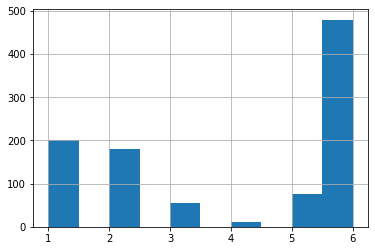

In [102]:
data_sub = pd.read_csv("data/submit_example.csv")
for i in range(0, len(data_sub)):
    data_sub.iloc[i]['Last Label'] = mean_pred[i]+1
data_sub.head()
import matplotlib.pyplot as plt
data_sub['Last Label'].hist()
plt.show()

In [103]:
data_sub.to_csv("sub6.csv", index=False)

In [41]:
train_df.to_csv("seee.csv", index=False)

,ID,Last Label
0,1,5
1,2,2
2,3,6
3,4,6
4,5,2
